# Correlação

Correlação é qualquer associação estatística entre um par de variáveis. Quanto mais correlacionadas estão duas variáveis, mais "alinhamento" há entre elas. Isto é, uma análise de correlação fornece um número que resume o grau de relacionamento linear entre duas variáveis. Introduziremos este assunto com alguns conceitos fundamentais.

## Associação entre variáveis e causalidade

A associação entre duas variáveis pode ocorrer de duas formas: 

- _correlacional_: neste caso, não há interferência alguma sobre as variáveis observadas. As variáveis são _aleatórias_ e seus comportamentos ocorrem conforme a "natureza" determina. Por exemplo, o exercício físico e a queima calórica possuem correlação positiva, pois quanto mais intensamente nos exercitamos, mais queimamos caloria. 

- _experimental_: neste caso, uma das variáveis é controlada e esta interfere sobre a outra. Isto é, uma variável A é a _causa_ (variável independente) e a outra, B, o _efeito_ (variável independente). Uma sentença lógica do tipo "se A, então B" estabelece a idéia de _causalidade_. Por exemplo: quando cientistas estudam a administração de fármacos em um organismo, eles analisam os efeitos dessa droga naquele organismo. Logo, a droga é a causa; a resposta orgânica, o efeito. 

### Correlação e dependência linear

Podemos interpretar a _correlação_ também pelo ponto de vista de "dependência linear". Duas variáveis perfeitamente correlacionadas são similares a dois vetores paralelos, ou seja, linearmente dependentes. Por outro lado, duas variáveis totalmente não correlacionadas são similares a dois vetores perpendiculares, ou seja, linearmente independentes.

## Escore padronizado

- Quando as variáveis que queremos comparar não estão expressas na mesma unidade (Ex. correlacionar alturas em cm e pesos em kg).

As duas soluções comuns para lidar com esses problemas são:

1. Transformar todos os valores para um _escore padronizado_. 
2. Transformar todos os valores para ranques baseados em percentis.

Para converter uma série $X$ de valores $x_i$ em uma escala padronizada de escores, subtraímos a média dos dados e dividimos esta diferença pelo desvio padrão. Isto é: 

$$z_i = \dfrac{x_i - \mu}{\sigma},$$

onde $\mu$ é a média e $\sigma$ o desvio padrão. 

Ao dividir os desvios (numerador) pelo desvio padrão, na verdade, estamos _normalizando_ o desvio, de modo que os valores $z_i$ da nova série $Z$ sejam adimensionais (sem unidades), possuam média 0 e variância 1. A série $Z$ herda a "forma" de $X$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

Vejamos exemplos:

In [2]:
# dataframe
dfp = pd.DataFrame({'Idade': np.array([20,19,21,22,20]),
       'Peso': np.array([55,80,62,67,73]),
       'Altura': np.array([162,178,162,165,171]),
       'IMC':np.array([20.96, 25.25, 23.62, 24.61, 24.96])},
        index=['Ana','João','Maria','Pedro','Túlio'])
dfp

,Idade,Peso,Altura,IMC
Ana,20,55,162,20.96
João,19,80,178,25.25
Maria,21,62,162,23.62
Pedro,22,67,165,24.61
Túlio,20,73,171,24.96


Vamos calcular o _z-score_ para todas as _Series_ do _DataFrame_.

In [3]:
def zScore(df,colname):
    s = df[colname]
    return (s - s.mean())/s.std(ddof=0) # ddof = 0 para dividir por N

In [4]:
# cria novo dataframe de z-scores
Z = {}

for c in dfp.columns:    
    Z[c + ':Z-score'] = zScore(dfp,c)

dfpz = pd.DataFrame(Z)
dfpz

,Idade:Z-score,Peso:Z-score,Altura:Z-score,IMC:Z-score
Ana,-0.392232,-1.435277,-0.910359,-1.871626
João,-1.372813,1.458427,1.690666,0.878126
Maria,0.588348,-0.625040,-0.910359,-0.166652
Pedro,1.568929,-0.046299,-0.422666,0.467906
Túlio,-0.392232,0.648190,0.552718,0.692245


Comentários: 

- Os _z-score_ ajudam a entender se uma observação específica é comum ou excepcional: 
    - _z-score_ < 0 representam valores abaixo da média;
    - _z-score_ > 0 representam valores acima da média;
    - _z-score_ da média é 0, uma vez que ela é ponto médio;
    - A soma dos _z-score_ = 0;
    - _z-scores_ com valores positivos extremamente altos indicam uma distribuição com _assimetria à direita_ (mais sobre isso adiante);
    - _z-scores_ com valores negativos extremamente altos indicam uma distribuição com _assimetria à esquerda_ (mais sobre isso adiante);
    - se |_z-score_| > 2, a distribuição é incomum ou excepcional.

In [5]:
# Z-Score das séries têm soma nula
dfpz.sum(axis=0)

Idade:Z-score     6.772360e-15
Peso:Z-score     -3.219647e-15
Altura:Z-score    4.662937e-15
IMC:Z-score      -6.994405e-15
dtype: float64

Calculando o z-score por função predefinida.

In [6]:
Z2 = {}

for c in dfp.columns:    
    Z2[c + ':Z-score'] = sts.zscore(dfp[c])

dfpz2 = pd.DataFrame(Z2,index=dfp.index)
dfpz2

,Idade:Z-score,Peso:Z-score,Altura:Z-score,IMC:Z-score
Ana,-0.392232,-1.435277,-0.910359,-1.871626
João,-1.372813,1.458427,1.690666,0.878126
Maria,0.588348,-0.625040,-0.910359,-0.166652
Pedro,1.568929,-0.046299,-0.422666,0.467906
Túlio,-0.392232,0.648190,0.552718,0.692245


In [7]:
# ambos os métodos dão resultados idênticos
(dfpz == dfpz2).all()

Idade:Z-score     True
Peso:Z-score      True
Altura:Z-score    True
IMC:Z-score       True
dtype: bool

### Plot de _z-scores_

A plotagem dos _z-scores_ pode ser feita diretamente com `plot` a partir da _Series_ $Z$ de interesse.

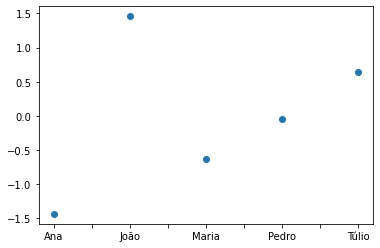

In [8]:
dfpz['Peso:Z-score'].plot(marker='o',ls='');

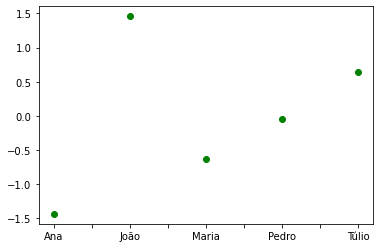

In [9]:
dfpz['Peso:Z-score'].plot(marker='o',ls='',color='g');

Comentários: 

- A partir desses plots, vemos claramente qual discente está "acima da", "abaixo da" ou "na" média perante a variável escolhida.

## Covariância

Quando queremos compreender como duas variáveis variam juntas, aplicamos o conceito de _covariância_. Se $X$ e $Y$ são duas _Series_, a covariância entre ambas é dada por 

$$\textrm{cov}(X,Y) = \frac{1}{n}\sum_{i=1}^n(x_i - \mu_X)(y_i - \mu_Y),$$

onde $n$ é o número de elementos na série (igual em ambas) e $\mu_X$ ($\mu_Y$) é a média de $X$($Y$). 

Notemos que a covariância é uma "média" do produto dos desvios.

**Exemplo:** vamos criar uma função para o cálculo da variância.

In [10]:
# covariância
def cov(df,colname1,colname2):
    s1,s2 = df[colname1],df[colname2]
    return np.dot( s1 - s1.mean(), s2 - s2.mean() )/(len(s1)-1)

Testemos a covariância entre as variáveis de nosso _DataFrame_ de estudo.

In [11]:
cov(dfp,'Altura','Peso'), cov(dfp,'Idade','Peso'), cov(dfp,'Idade','Altura')

(62.7, -4.7, -5.300000000000001)

Comentários:
- Esses cálculos mostram que variações de _altura_ e _peso_ interferem consideravelmente uma na outra "na mesma direção".
- Porém, não notamos o mesmo comportamento para _idade_ e _peso_ ou para _idade_ e _altura_.

Podemos checar o cálculo de nossa função com a função `var` do _pandas_, sabendo que $\text{cov}(X,X) = \text{var}(X) = S^2(X), \, \forall X$.

In [12]:
cov(dfp,'Altura','Altura'), dfp['Altura'].var()

(47.3, 47.3)

Outra forma de calcular a covariância é usar o método `cov` de uma `pandas.Series`.

In [13]:
dfp['Altura'].cov(dfp['Peso'])

62.7

### Matriz de covariâncias

Podemos usar a função `numpy.cov()` para computar a covariância entre duas _Series_ $X$ e $Y$. Para tanto, devemos passar a matriz $[X \ \ Y]$ como parâmetro para a função. 

A resposta é uma _matriz de covariâncias_ 2x2 cujas entradas são: 

$$\begin{bmatrix}
\text{cov}(X,X) & \text{cov}(X,Y) \\
\text{cov}(Y,X) & \text{cov}(Y,Y)
\end{bmatrix}$$

In [14]:
X, Y = dfp['Altura'], dfp['Peso']
np.cov(np.array([X,Y]))

array([[47.3, 62.7],
       [62.7, 93.3]])

## Correlação

Uma das dificuldades conhecidas da covariância é a sua interpretação. Uma vez que ela é dada pelo produto das unidades de suas entradas, muito frequentemente será inviável atribuir significado ao número. Por exemplo, se a unidade de $X$ for quilogramas e $Y$ for anos, a unidade da covariância seria quilogramas vezes anos. Um meio de solucionar este problema é dividir o produto da covariância pelo desvio padrão de cada série de dados, assim formando o conceito de _correlação_, dado por: 

$$\rho(X,Y) = \frac{1}{n}\sum_{i=1}^n\frac{(x_i - \mu_X)}{\sigma_X}\frac{(y_i - \mu_Y)}{\sigma_Y}.$$

Em outras palavras, a correlação é a soma do produto de escores padronizados. 

### Coeficiente de correlação de Pearson

Se os desvios forem retirados da somatória, a expressão torna-se: 

$$\rho(X,Y) = \frac{1}{\sigma_X \sigma_Y}\frac{1}{n}\sum_{i=1}^n(x_i - \mu_X)(y_i - \mu_Y) = \frac{\textrm{cov}(X,Y)}{{\sigma_X \sigma_Y}}.$$

O número $\rho$ é chamado de _coeficiente de correlação de Pearson_, ou simplesmente _correlação de Pearson_, e vale que $-1 \leq \rho \leq 1$. A magnitude de $\rho$ determina a _força de correlação_ entre as variáveis. Em geral, a seguinte interpretação é utilizada: 

- $\rho = 1$: as variáveis são perfeitamente correlacionadas.
- $\rho = 0$: as variáveis são correlacionadas de alguma forma, mas **não** linearmente. Neste sentido, $\rho$ subestimará a força da dependência linear.
- $\rho = -1$: idem, porém negativamente.

<img src='../figs/12/correlation.png' width=800px>

**Exemplo:** A tabela a seguir contém dados coletados na administração de um zoológico para alguns dias do mês de abril de 2021. Nesta ordem, a tabela mostra o número de visitantes no zoológico, o número de tickets de estacionamento adquiridos e a temperatura média contabilizados por dia.

|   Visitantes |   Tickets         |   Temperatura     |
|-------------:|------------------:|------------------:|
|         1580 |                 8 |                35 |
|         1230 |                 6 |                38 |
|         1950 |                 9 |                32 |
|          890 |                 4 |                26 |
|         1140 |                 6 |                31 |
|         1760 |                 9 |                36 |
|         1650 |                10 |                38 |
|         1470 |                 3 |                30 |
|          390 |                 1 |                21 |
|         1460 |                 9 |                34 |
|         1000 |                 7 |                36 |
|         1030 |                 6 |                32 |
|          740 |                 2 |                25 |
|         1340 |                 6 |                37 |
|         1150 |                 7 |                34 |

O arquivo com os dados está disponível [aqui]('../database/visitantes-zoo.csv'). Vamos buscar correlações nos dados.

Carregando o arquivo:

In [15]:
zoo = pd.read_csv('../database/visitantes-zoo.csv'); zoo

,Visitantes,Tickets:Parking,Temperatura (C)
0,1580.0,8.0,35.0
1,1230.0,6.0,38.0
2,1950.0,9.0,32.0
3,890.0,4.0,26.0
4,1140.0,6.0,31.0
5,1760.0,9.0,36.0
6,1650.0,10.0,38.0
7,1470.0,3.0,30.0
8,390.0,1.0,21.0
9,1460.0,9.0,34.0


Para calcular a correlação de Pearson entre duas séries, podemos usar a função `pearsonr()` do módulo `scipy.stats`.

In [16]:
corr1,_ = sts.pearsonr(zoo['Visitantes'],zoo['Tickets:Parking']); 
corr2,_ = sts.pearsonr(zoo['Visitantes'],zoo['Temperatura (C)']);

corr1,corr2

(0.8044243219605788, 0.6815723802241447)

Comentários: 

- O coeficiente de Pearson mostra que há uma "força" de correlação não desprezível entre o número de visitantes e tickets vendidos.
- Esta correlação é menor para a faixa de temperaturas médias.

A correlação pode também ser calculada através do método `corr` de uma _Series_ do pandas.

In [17]:
zoo['Visitantes'].corr(zoo['Tickets:Parking'])

0.8044243219605786

In [18]:
zoo['Visitantes'].corr(zoo['Temperatura (C)'])

0.6815723802241447

#### Correlações pareadas

Usando o método `pandas.DataFrame.corrwith()` é possível calcular correlações pareadas entre colunas de um _DataFrame_ ou linhas de outra _Series_ ou _DataFrame_.

No exemplo abaixo, passamos uma _Series_ como argumento. A resposta são os mesmos valores obtidos anteriormente, porém na forma de uma _Series_. O valor unitário é devido à correlação da variável com ela própria.

In [19]:
zoo.corrwith(zoo['Visitantes'])

Visitantes         1.000000
Tickets:Parking    0.804424
Temperatura (C)    0.681572
dtype: float64

### Gráfico de dispersão

Antes de calcular cegamente o valor de $\rho$ para séries de dados, é interessante fazer um gráfico de _dispersão_ (_scatter plot_) entre as variáveis. Podemos fazer isto com o `matplotlib.pyplot.plot()` e tipo de marcador `o` ou com `matplotlib.pyplot.scatter()`.

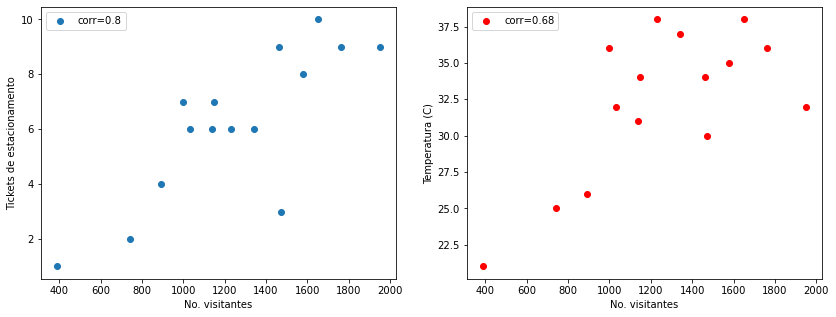

In [20]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
# plot 1
ax[0].plot(zoo['Visitantes'],zoo['Tickets:Parking'],'o',label=f'corr={round(corr1,2)}')
ax[0].set_xlabel('No. visitantes'); 
ax[0].set_ylabel('Tickets de estacionamento'); 
ax[0].legend()
# plot 2
ax[1].plot(zoo['Visitantes'],zoo['Temperatura (C)'],'or',label=f'corr={round(corr2,2)}')
ax[1].set_xlabel('No. visitantes'); 
ax[1].set_ylabel('Temperatura (C)'); 
ax[1].legend();


Reproduzindo com `plt.scatter`:

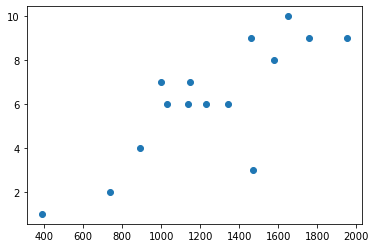

In [21]:
plt.scatter(zoo['Visitantes'],zoo['Tickets:Parking']); 

## Leituras recomendadas 

- [Paradoxo de Simpson](https://pt.wikipedia.org/wiki/Paradoxo_de_Simpson)
- [statsmodels](https://www.statsmodels.org/stable/index.html)
- [Outliers, o que são e como tratá-los em uma análise de dados?](https://www.aquare.la/o-que-sao-outliers-e-como-trata-los-em-uma-analise-de-dados/)